Temat projektu: Wypadki lotnicze w latach 1918 - 2022. 
Źródło zbioru danych: https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data




In [1]:
# Zaimportowanie podstawowych bibliotek oraz datasetu
import pandas as pd
import numpy as np

crashes = pd.read_csv('Plane Crashes.csv')

In [2]:
# Wyświetlenie pierwszych wierszy z wczytanego zbioru danych
crashes.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


In [3]:
# Sprawdzenie czy zbiór danych zawiera dane dla katastrof w Polsce 
print(crashes.loc[crashes['Country'] == 'Poland'])

             Date        Time                Aircraft  \
252    1921-02-18   10H 0M 0S            Junkers F.13   
545    1923-12-31         NaN            Junkers F.13   
566    1924-07-14         NaN         Blériot Spad 46   
707    1926-05-26         NaN                Potez 25   
846    1927-08-23         NaN            Junkers A.20   
...           ...         ...                     ...   
26926  2011-07-14  22H 30M 0S               ATR72-200   
26988  2011-11-01  14H 39M 0S          Boeing 767-300   
27443  2014-06-08  11H 15M 0S         PZL-Mielec AN-2   
27458  2014-07-05  16H 11M 0S  Piper PA-31-310 Navajo   
27841  2016-11-24   12H 5M 0S  Piper PA-31-310 Navajo   

                                               Operator Registration  \
252                                       Lloyd-Ostflug        D-128   
545                               Danziger Luftreederei        Dz.40   
566    Compagnie Franco-Roumaine de Navigation Aérienne       F-AEHU   
707                        

In [4]:
# Utworzenie nowej zmiennej zawierającej wiersze ze zbioru danych, gdzie kolumna 'Country' ma wartość 'Poland'
poland_data = crashes.loc[crashes['Country'] == 'Poland']

In [5]:
# Sprawdzenie pierwszych wierszy dotyczących Polski
poland_data.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
252,1921-02-18,10H 0M 0S,Junkers F.13,Lloyd-Ostflug,D-128,Flight,Charter/Taxi (Non Scheduled Revenue Flight),No,"Plain, Valley",Gdansk – Berlin,...,Poland,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was performing a flight from Gdansk t...,Human factor
545,1923-12-31,NaN,Junkers F.13,Danziger Luftreederei,Dz.40,Landing (descent or approach),Postal (mail),Yes,Airport (less than 10 km from airport),NaN,...,Poland,Europe,1.0,0.0,0.0,0.0,0.0,0,The pilot was performing a mail flight. On app...,Unknown
566,1924-07-14,NaN,Blériot Spad 46,Compagnie Franco-Roumaine de Navigation Aérienne,F-AEHU,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Prague - Warsaw,...,Poland,Europe,1.0,0.0,3.0,0.0,0.0,0,Crashed on landing at Warsaw Airport. The airc...,Unknown
707,1926-05-26,NaN,Potez 25,Georges Pelletier-Doisy,Boby I,Takeoff (climb),Private,Yes,Airport (less than 10 km from airport),NaN,...,Poland,Europe,2.0,0.0,0.0,0.0,0.0,0,The crew was engaged in a long flight from Par...,Other causes
846,1927-08-23,NaN,Junkers A.20,Deutsche Verkehrsfliegerschule - DVS,D-854,Flight,Training,No,"Plain, Valley",Berlin - Berlin,...,Poland,Europe,1.0,1.0,0.0,0.0,0.0,1,"The pilot, sole on board, departed Berlin-Staa...",Unknown


In [6]:
# Sprawdzenie pierwszych wierszy dotyczących Polski
poland_data.tail()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
26926,2011-07-14,22H 30M 0S,ATR72-200,EuroLOT,SP-LFH,Taxiing,Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Wroclaw – Warsaw,...,Poland,Europe,4.0,0.0,33.0,0.0,0.0,0,"On 14 July, 2011 ATR 72 flight crew after land...",Human factor
26988,2011-11-01,14H 39M 0S,Boeing 767-300,LOT Polish Airlines - Polskie Linie Lotnicze,SP-LPC,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Newark - Warsaw,...,Poland,Europe,10.0,0.0,221.0,0.0,0.0,0,"On November 1, 2011 a passenger LO 16 flight o...",Technical failure
27443,2014-06-08,11H 15M 0S,PZL-Mielec AN-2,Aeroklub Warminsko-Mazurski,SP-FDZ,Landing (descent or approach),Skydiving / Paratroopers,Yes,Airport (less than 10 km from airport),Olsztyn - Olsztyn,...,Poland,Europe,2.0,0.0,0.0,0.0,0.0,0,The single engine aircraft was completing loca...,Human factor
27458,2014-07-05,16H 11M 0S,Piper PA-31-310 Navajo,Omega Skydiving School,N11WB,Takeoff (climb),Skydiving / Paratroopers,Yes,Airport (less than 10 km from airport),Czestochowa - Czestochowa,...,Poland,Europe,1.0,1.0,11.0,10.0,0.0,11,The twin engine aircraft was engaged in a seri...,Technical failure
27841,2016-11-24,12H 5M 0S,Piper PA-31-310 Navajo,Ger-Pol Air Taxi,D-IFBU,Takeoff (climb),Ferry,No,Airport (less than 10 km from airport),Zielona Góra - Nordhorn,...,Poland,Europe,1.0,1.0,0.0,0.0,0.0,1,While taking off from a grassy runway at Zielo...,Human factor


In [7]:
# Liczba dostępnych danych w każdej kolumnie dla Polski
poland_data.count()

Date                110
Time                 29
Aircraft            110
Operator            110
Registration        106
Flight phase         98
Flight type         108
Survivors            70
Crash site          100
Schedule             47
MSN                 104
YOM                  98
Flight no.            0
Crash location      110
Country             110
Region              110
Crew on board       110
Crew fatalities     110
Pax on board        110
PAX fatalities      110
Other fatalities    110
Total fatalities    110
Circumstances       110
Crash cause         110
dtype: int64

In [8]:
# Sprawdzenie typów danych
print(crashes.dtypes)

Date                 object
Time                 object
Aircraft             object
Operator             object
Registration         object
Flight phase         object
Flight type          object
Survivors            object
Crash site           object
Schedule             object
MSN                  object
YOM                 float64
Flight no.          float64
Crash location       object
Country              object
Region               object
Crew on board       float64
Crew fatalities     float64
Pax on board        float64
PAX fatalities      float64
Other fatalities    float64
Total fatalities      int64
Circumstances        object
Crash cause          object
dtype: object


Etap projektu 3: 
Czyszczenie danych: Radzenie sobie z brakującymi wartościami, wartościami odstającymi i przygotowanie danych do analizy.


In [9]:
# Sprawdzenie brakujących wartości
print("Brakujące wartości w zbiorze danych:")
print(crashes.isnull().sum())

Brakujące wartości w zbiorze danych:
Date                    0
Time                14587
Aircraft                1
Operator                0
Registration          815
Flight phase          638
Flight type            57
Survivors            1297
Crash site            383
Schedule             8946
MSN                  4182
YOM                  5311
Flight no.          28536
Crash location         12
Country                 1
Region                  1
Crew on board          24
Crew fatalities         1
Pax on board           54
PAX fatalities          1
Other fatalities       10
Total fatalities        0
Circumstances          25
Crash cause             0
dtype: int64


In [11]:
# Usunięcie kolumn z ponad 50% brakujących wartości
crashes = crashes.dropna(thresh=0.5 * len(crashes), axis=1)

In [12]:
# Definicja kolumn liczbowych
numerical_columns = crashes.select_dtypes(include=['float64', 'int64']).columns

# Wypełnianie braków w kolumnach liczbowych
for col in numerical_columns:
    crashes.loc[:, col] = crashes[col].fillna(crashes[col].mean())

# Wypełnianie braków w kolumnach kategorycznych
categorical_columns = crashes.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if not crashes[col].mode().empty:
        crashes.loc[:, col] = crashes[col].fillna(crashes[col].mode()[0])

# Sprawdzenie braków po czyszczeniu
print("Braki po czyszczeniu:")
print(crashes.isnull().sum())

Braki po czyszczeniu:
Date                0
Aircraft            0
Operator            0
Registration        0
Flight phase        0
Flight type         0
Survivors           0
Crash site          0
Schedule            0
MSN                 0
YOM                 0
Crash location      0
Country             0
Region              0
Crew on board       0
Crew fatalities     0
Pax on board        0
PAX fatalities      0
Other fatalities    0
Total fatalities    0
Circumstances       0
Crash cause         0
dtype: int64


In [13]:
# Identyfikacja i usunięcie wartości odstających
numerical_columns = crashes.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    q1 = crashes[col].quantile(0.25)
    q3 = crashes[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

# Informacja o wartościach odstających
print(f"Kolumna '{col}' ma wartości odstające.")

Kolumna 'Total fatalities' ma wartości odstające.


In [14]:
# Usuwanie wartości odstających
crashes = crashes[(crashes[col] >= lower_bound) & (crashes[col] <= upper_bound)]

# Ograniczenie maksymalnej liczby pasażerów, załogi oraz roku produkcji do realistycznych wartości
crashes = crashes[(crashes['Pax on board'] <= 600) & (crashes['Crew on board'] <= 50)]
crashes = crashes[(crashes['YOM'] >= 1900) & (crashes['YOM'] <= 2022)]

# Finalne sprawdzenie danych po ograniczeniu wartości
print("Podsumowanie danych po ograniczeniu wartości:")
print(crashes.describe())

Podsumowanie danych po ograniczeniu wartości:
                YOM  Crew on board  Crew fatalities  Pax on board  \
count  25675.000000   25675.000000     25675.000000  25675.000000   
mean    1953.534490       2.705755         1.432046      4.644794   
std       20.687841       2.620316         2.164912     18.341485   
min     1918.000000       0.000000         0.000000      0.000000   
25%     1931.942519       1.000000         0.000000      0.000000   
50%     1946.000000       2.000000         1.000000      0.000000   
75%     1971.000000       4.000000         2.000000      3.000000   
max     2020.000000      48.000000        12.000000    451.000000   

       PAX fatalities  Other fatalities  Total fatalities  
count    25675.000000      25675.000000      25675.000000  
mean         0.698644          0.025593          2.160740  
std          1.741755          0.323528          2.882158  
min          0.000000          0.000000          0.000000  
25%          0.000000          0

In [15]:
# Podsumowanie danych po dalszym czyszczeniu:
# - Rok produkcji (YOM): Zakres od 1918 do 2020 wygląda realistycznie.
# - Liczba załogi (Crew on board): Maksymalna wartość 48 jest spójna z dużymi samolotami. Wartość 0 może dotyczyć samolotów cargo.
# - Liczba pasażerów (Pax on board): Maksymalna wartość 451 jest realistyczna dla dużych samolotów pasażerskich.
# - Całkowita liczba ofiar (Total fatalities): Zakres od 0 do 12 jest poprawny i spójny z mniejszymi katastrofami.
# - Inne ofiary (Other fatalities): Maksymalna wartość 11 sugeruje katastrofy wpływające na osoby na ziemi.

In [17]:
# Utworzenie nowego pliku csv z oczyszczonymi danymi
crashes.to_csv("Cleaned_Historical_Crashes.csv", index=False)

In [18]:
# Wczytanie nowego pliku csv, na którym będzie oparta analiza
dataset = pd.read_csv(Ś)

Etap projektu 4:
Analiza danych: Przeprowadź dokładną analizę, koncentrując się na odkrywaniu zależności, trendów i wzorców. Metody analizy muszą być dostosowane do typu danych.
Przykłady:
- Dla szeregów czasowych, mogą pasować takie metody jak średnie kroczące, metody dekompozycji, itd. - Dla danych kategorycznych, można użyć jak tabele krzyżowe, test chi-kwadrat, itd.
- Dla danych ciągłych, możemy użyć analizę korelacji, regresję, itd.
(to są tylko przykłady ogólne, w konkretnych przypadkach mogą być użyte inne metody z uzasadnieniem)

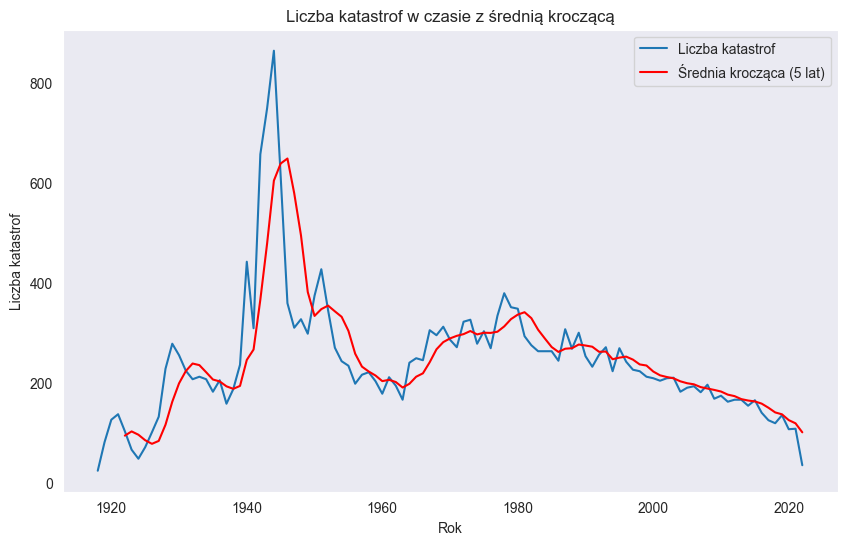

In [19]:
# Szereg czasowy - użycie średnich kroczącących oraz dekompozycje do analizy liczby katastrof w czasie

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Konwersja 'Date' na datetime
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Grupowanie liczby katastrof rocznie
yearly_crashes = dataset['Date'].dt.year.value_counts().sort_index()

# Średnia krocząca (np. 5-letnia)
rolling_mean = yearly_crashes.rolling(window=5).mean()

# Wykres trendu i średniej kroczącej
plt.figure(figsize=(10, 6))
plt.plot(yearly_crashes.index, yearly_crashes.values, label='Liczba katastrof')
plt.plot(yearly_crashes.index, rolling_mean, label='Średnia krocząca (5 lat)', color='red')
plt.title('Liczba katastrof w czasie z średnią kroczącą')
plt.xlabel('Rok')
plt.ylabel('Liczba katastrof')
plt.legend()
plt.grid()
plt.show()

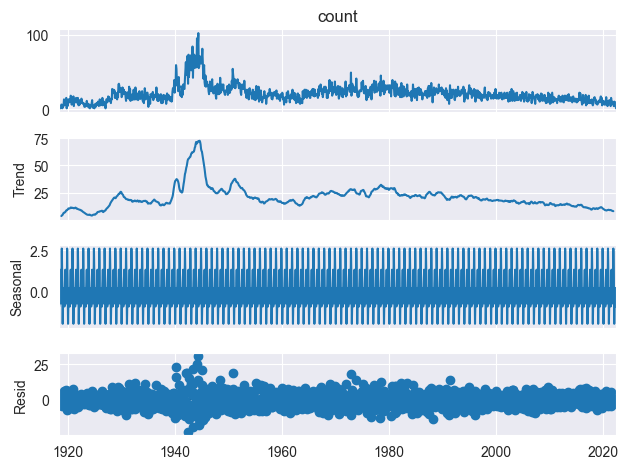

In [20]:
# Przygotowanie danych do dekompozycji (miesięczne dane)
monthly_crashes = dataset['Date'].dt.to_period('M').value_counts().sort_index()

# Konwersja na indeks czasowy
monthly_crashes.index = monthly_crashes.index.to_timestamp()

# Dekompozycja szeregów czasowych
decomposition = seasonal_decompose(monthly_crashes, model='additive', period=12)

# Wykres dekompozycji
decomposition.plot()
plt.show()

In [21]:
# Podsumowanie wyników dekompozycji:
# - Liczba katastrof (Observed): wzrost do połowy XX wieku, a następnie spadek.
# - Trend: pokazuje ogólny spadek liczby katastrof w ostatnich dekadach.
# - Sezonowość (Seasonal): widoczne cykliczne wzorce, np. większa liczba katastrof w określonych porach roku.
# - Reszty (Residual): wskazują na nietypowe zdarzenia wykraczające poza trend i sezonowość.

In [22]:
# Dane kategoryczne

from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# (ponowne) filtrowanie danych dla Polski
poland_data = dataset[dataset['Country'] == 'Poland']

# Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (ile katastrof związanych z konkretną przyczyną (crash cause) wystąpiło w różnych fazach lotu (flight phase)?)
crash_cause_vs_phase = pd.crosstab(poland_data['Crash cause'], poland_data['Flight phase'])

# Test chi-kwadrat (czy istnieje zaleznosc pomiedzy zmiennymi, jeśli p-wartość<0.05, zależność jest statystycznie istotna)
chi2, p, dof, expected = chi2_contingency(crash_cause_vs_phase)

# Wyświetlenie wyników
print("Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska):")
print(crash_cause_vs_phase)
print(f"\nWyniki testu chi-kwadrat:")
print(f" - Wartość chi-kwadrat: {chi2:.2f}")
print(f" - p-wartość: {p:.4f}")
print(f" - Stopnie swobody: {dof}")

Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska):
Flight phase       Flight  Landing (descent or approach)  Takeoff (climb)  \
Crash cause                                                                 
Human factor            5                              8                2   
Other causes            1                              0                1   
Technical failure       7                              4                3   
Unknown                50                             10                2   
Weather                 4                              2                0   

Flight phase       Taxiing  
Crash cause                 
Human factor             1  
Other causes             0  
Technical failure        0  
Unknown                  0  
Weather                  0  

Wyniki testu chi-kwadrat:
 - Wartość chi-kwadrat: 27.86
 - p-wartość: 0.0058
 - Stopnie swobody: 12


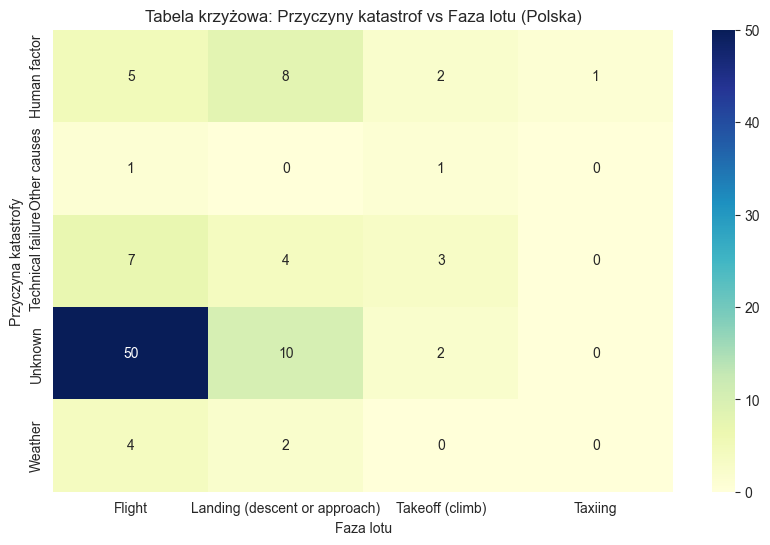

In [23]:
# Wizualizacja tabeli krzyżowej
plt.figure(figsize=(10, 6))
sns.heatmap(crash_cause_vs_phase, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska)')
plt.xlabel('Faza lotu')
plt.ylabel('Przyczyna katastrofy')
plt.show()

In [24]:
# Interpretacja wyników:
# - Tabela krzyżowa: Przyczyny katastrof vs Faza lotu (Polska):
#   Najwięcej katastrof o nieznanej przyczynie ("Unknown") miało miejsce podczas lotu ("Flight").
#   "Human factor" był częstą przyczyną podczas lądowania ("Landing").
#   "Technical failure" zdarzał się zarówno podczas lotu, jak i startu ("Takeoff").
#
# - Test chi-kwadrat:
#   Wartość chi-kwadrat: 27.86, p-wartość: 0.0058.
#   Ponieważ p-wartość < 0.05, istnieje statystycznie istotna zależność między przyczyną katastrofy a fazą lotu.
#   Oznacza to, że określone przyczyny katastrof mogą być bardziej związane z konkretnymi fazami lotu.

In [25]:
# Dane ciągłe
# Regresja - czy starsze samoloty są bardziej narażone na katastrofy z większą liczbą ofiar?

from sklearn.linear_model import LinearRegression
import numpy as np

# Dane do regresji
X = dataset[['YOM']].fillna(0)
y = dataset['Total fatalities']

# Tworzenie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Współczynniki regresji
print(f"Współczynnik nachylenia (slope): {model.coef_[0]:.2f}")
print(f"Wyraz wolny (intercept): {model.intercept_:.2f}")

Współczynnik nachylenia (slope): -0.01
Wyraz wolny (intercept): 17.80


In [30]:
# Interpretacja wyników regresji:
# - Współczynnik nachylenia (slope): -0.01
#   -> Każdy dodatkowy rok produkcji zmniejsza średnią liczbę ofiar o 0.01.
#   -> Starsze samoloty mają większe ryzyko katastrof z większą liczbą ofiar.
#
# - Wyraz wolny (intercept): 17.80
#   -> Bazowa liczba ofiar dla hipotetycznego "zerowego roku produkcji".
#
# Wniosek: Nowsze samoloty są bezpieczniejsze.

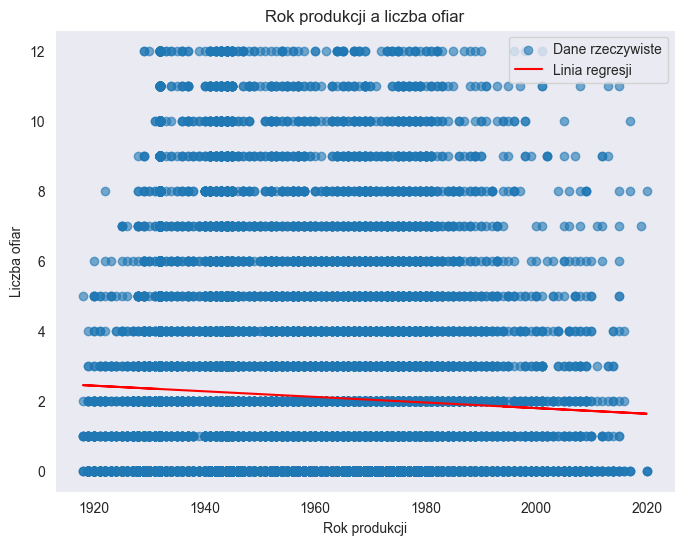

In [31]:
# Przewidywanie wartości
y_pred = model.predict(X)

# Wizualizacja regresji
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Dane rzeczywiste')
plt.plot(X, y_pred, color='red', label='Linia regresji')
plt.title('Rok produkcji a liczba ofiar')
plt.xlabel('Rok produkcji')
plt.ylabel('Liczba ofiar')
plt.legend()
plt.grid()
plt.show()

In [32]:
# Interpretacja wyniku regresji liniowej:
# - Dane rzeczywiste (niebieskie punkty): Pokazują rozproszenie liczby ofiar w zależności od roku produkcji samolotu.
#   Brak wyraźnego trendu sugeruje, że rok produkcji nie ma istotnego wpływu na liczbę ofiar.
#
# - Linia regresji (czerwona): Wskazuje bardzo łagodny spadek liczby ofiar wraz z rokiem produkcji (slope = -0.01).
#   Oznacza to, że liczba ofiar zmniejsza się średnio o 0.01 na każdy dodatkowy rok produkcji, co jest znikomo małą zmianą.
#
# - Wniosek: Rok produkcji samolotu ma minimalny wpływ na liczbę ofiar w katastrofach.
#   Inne czynniki, takie jak przyczyny katastrof, liczba pasażerów czy faza lotu, prawdopodobnie odgrywają większą rolę.

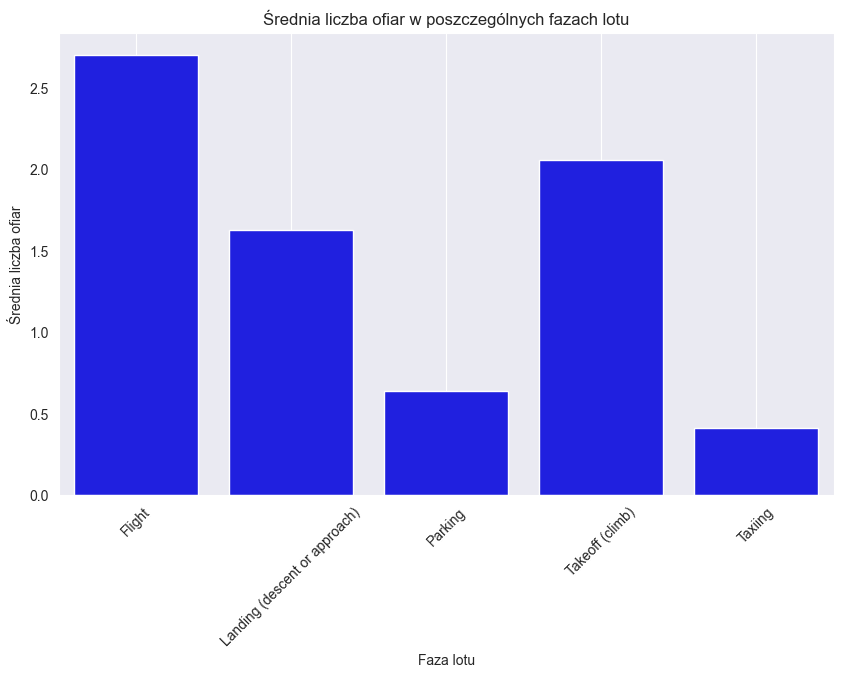

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grupowanie danych według fazy lotu i liczenie średniej liczby ofiar
phase_fatalities = dataset.groupby('Flight phase')['Total fatalities'].mean().reset_index()

# Wizualizacja
plt.figure(figsize=(10, 6))
sns.barplot(data=phase_fatalities, x='Flight phase', y='Total fatalities', color='blue')
plt.title('Średnia liczba ofiar w poszczególnych fazach lotu')
plt.xlabel('Faza lotu')
plt.ylabel('Średnia liczba ofiar')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [34]:
# Analiza wykresu: Średnia liczba ofiar w poszczególnych fazach lotu
# - Faza lotu "Flight" (lot w powietrzu) jest najbardziej niebezpieczna, ze średnią liczbą ofiar powyżej 2.5.
#   Wskazuje to, że katastrofy w powietrzu często kończą się większą liczbą ofiar.
#
# - Faza "Takeoff (climb)" (start/wznoszenie) jest drugą najbardziej ryzykowną fazą, ze średnią liczbą ofiar
#   około 2. Jest to zgodne z faktem, że start jest jedną z bardziej krytycznych faz lotu.
#
# - Lądowanie ("Landing (descent or approach)") ma średnią liczbę ofiar nieco niższą niż podczas startu,
#   ale nadal stanowi istotne ryzyko.
#
# - "Parking" i "Taxiing" (kołowanie) mają znacznie niższą średnią liczbę ofiar, co sugeruje, że katastrofy
#   w tych fazach są rzadkie i mniej tragiczne.
#
# Wniosek:
# - Fazy lotu "Flight", "Takeoff" i "Landing" są najbardziej ryzykowne pod względem liczby ofiar.
# - Warto skoncentrować dodatkowe środki bezpieczeństwa na tych fazach, szczególnie w powietrzu i podczas startu.